# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.

    Arguments:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.

    Returns:
    state_neuron (1D list): A list of neuron states (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2), "Input arrays must be of the same length"

    state_neuron = []

    for x1, x2 in zip(X1, X2):
        # Element-wise addition
        sum_inputs = x1 + x2

        # Compare with threshold
        if sum_inputs >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.

    Arguments:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.

    Returns:
    state_neuron (1D list): A list of neuron states (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2), "Input arrays must be of the same length"

    state_neuron = []

    for x1, x2 in zip(X1, X2):
        # Element-wise addition
        sum_inputs = x1 + x2

        # Compare with threshold
        if sum_inputs >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Question - 1: List out all the limitations of MCP - Neurons.

ans- Limitations of MCP Neurons

Linearly Separable Functions Only:
MCP neurons can only represent boolean functions that are linearly separable.


Lacks Biological Realism: MCP neurons do not mimic the complexity of biological neural networks.

No Learning Mechanism: MCP neurons cannot learn from data. Weights and thresholds must be set manually.

Binary Inputs and Outputs: Works only with binary inputs (0 or 1) and produces binary outputs.

Single-Layer Limitation: MCP neurons are limited to single-layer networks, which restricts their ability to solve complex problems.

• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.

ans- XOR function cannot be solved using a single MCP neuron because it is not linearly separable.

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Question - 1: What does the shape of X represent?

ans- The number of images in the dataset and number of pixels in each image (flattened from a 28x28 image).

Question - 2: What does the shape of Y represent?

ans- The number of labels in the dataset (one label for each image).

### Viewing the Dataset.

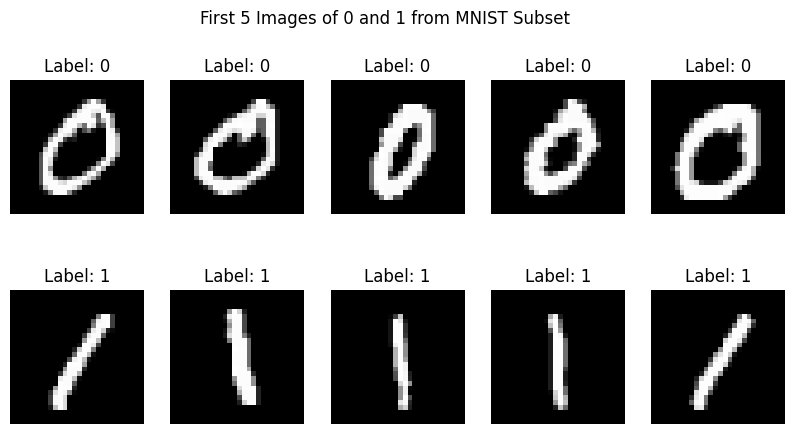

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Question - 3: What does the weights array represent in this context?

ans - The weights array represents the importance or contribution of each input feature (pixel) to the model's prediction.

Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?

ans- We initializing the weights to zero to ensure all features start with equal importance.

For basic models like a single-layer perceptron, this works fine because the learning process (like gradient descent) adjusts the weights correctly. However, for more complex models (like deep neural networks), starting with zero weights can cause problems. All neurons might end up learning the same thing because they get the same updates, which slows down training.

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Compute the linear combination of inputs, weights, and bias
    predictions = np.dot(X, weights) + bias

    # Apply the step function as the activation function
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    n_samples, n_features = X.shape

    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(n_samples):
            # Compute the linear combination of inputs, weights, and bias
            linear_output = np.dot(X[i], weights) + bias

            # Apply the step function to get the predicted label
            y_pred = 1 if linear_output >= 0 else 0

            # Update weights and bias if the prediction is incorrect
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1

        # Calculate accuracy for the current epoch
        accuracy = correct_predictions / n_samples

        # Early stopping if accuracy is 100%
        if accuracy == 1.0:
            break

    return weights, bias, accuracy

Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

ans- This line computes the linear combination of the input features (X[i]), weights, and bias. This value is used to decide the predicted label (1 or 0) by applying the step function.

Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?

ans- When the prediction is wrong (y_pred != y[i]), the weights and bias are updated to reduce the error.

weights += learning_rate * (y[i] - y_pred) * X[i]

bias += learning_rate * (y[i] - y_pred)


Question - 7:Why is the final accuracy important, and what do you expect it to be?

ans- The final accuracy measures how well the perceptron has learned to classify the training data.

If the data is linearly separable, the perceptron should achieve 100% accuracy on the training set after sufficient training. If the data is not linearly separable, the accuracy will be less than 100%, and the perceptron may not converge.

## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

Final Accuracy: 0.9916


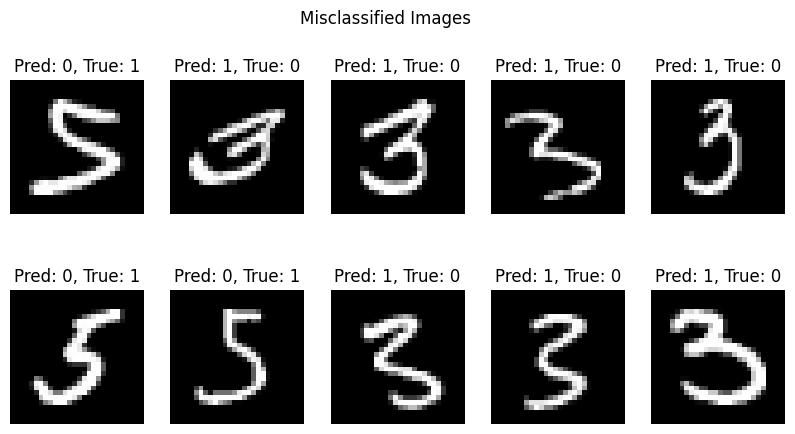

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Question - 8:What does misclassified idx store, and how is it used in this code?

ans- misclassified_idx stores the indices of the data points (images) that were misclassified by the model.

The code checks if there are any misclassified images and if it exist, it displays up to 10 of them. Each misclassified image is displayed with its predicted label and true label.

Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

ans- It means that the model achieved 100% accuracy on the training data.

###Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI/mnist_3_and_5.csv")

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


In [ ]:
# Step 2: Preprocess the data
# Convert labels to binary: 3 → 0, 5 → 1
y = np.where(y == 3, 0, 1)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Step 3: Initialize weights and bias
weights = np.zeros(X.shape[1])  # One weight per feature (pixel)
bias = 0

In [ ]:
# Step 4: Train the Perceptron
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    n_samples, n_features = X.shape

    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(n_samples):
            # Compute the linear combination of inputs, weights, and bias
            linear_output = np.dot(X[i], weights) + bias

            # Apply the step function to get the predicted label
            y_pred = 1 if linear_output >= 0 else 0

            # Update weights and bias if the prediction is incorrect
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1

        # Calculate accuracy for the current epoch
        accuracy = correct_predictions / n_samples

        # Early stopping if accuracy is 100%
        if accuracy == 1.0:
            break

    return weights, bias, accuracy

In [ ]:
# Train the model
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Step 5: Evaluate the model
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

Final Accuracy: 0.9916


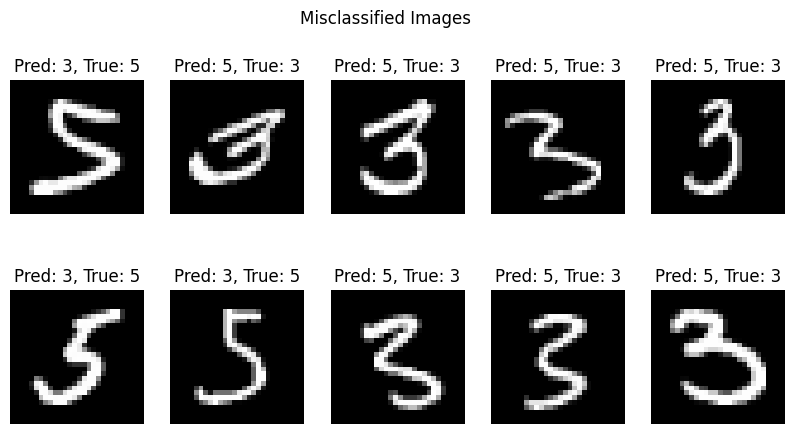

In [ ]:
# Step 6: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {5 if y_pred[idx] == 1 else 3}, True: {5 if y[idx] == 1 else 3}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")